<a href="https://colab.research.google.com/github/madilima/keras-tensorflow-2/blob/main/Aula3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:

import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

Carregando o dataset

In [30]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()


Exploração dos dados

In [31]:

len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)

identificacoes_treino.min()
identificacoes_treino.max()

9

Exibir os dados

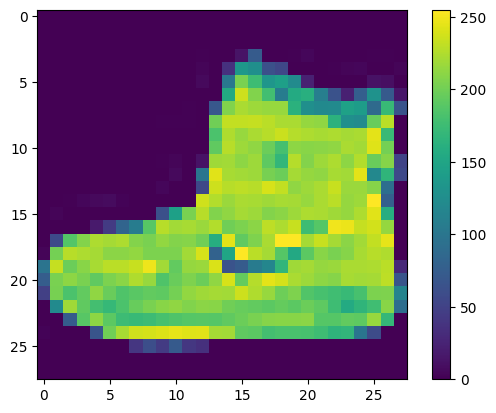

In [32]:

total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover',
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()


Normalizando as imagens


In [33]:
imagens_treino = imagens_treino/float(255)

Criando, compilando, treinando e normalizando o modelo


In [34]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5260 - accuracy: 0.8138 - val_loss: 0.4397 - val_accuracy: 0.8327
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3997 - accuracy: 0.8524 - val_loss: 0.3656 - val_accuracy: 0.8685
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3641 - accuracy: 0.8658 - val_loss: 0.3487 - val_accuracy: 0.8711
Epoch 4/5
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3409 - accuracy: 0.8743 - val_loss: 0.3357 - val_accuracy: 0.8787
Epoch 5/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3242 - accuracy: 0.8798 - val_loss: 0.3319 - val_accuracy: 0.8782


Sumário


In [35]:
sumario_do_modelo = modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Pesos da primeira camada Dense

In [36]:
pesos_camada_dense = modelo.layers[1].get_weights()
pesos_camada_dense

[array([[ 0.02985977,  0.06343794, -0.01840935, ...,  0.06650618,
         -0.13340747,  0.01742981],
        [-0.02788799, -0.03907514,  0.08885791, ..., -0.07984608,
         -0.15819171, -0.05896964],
        [ 0.04771785, -0.03873288, -0.01248627, ..., -0.02599432,
         -0.16774581, -0.00241065],
        ...,
        [ 0.01908442, -0.03917637,  0.07501807, ..., -0.08770023,
         -0.09780677, -0.08537481],
        [ 0.01661907,  0.06263062, -0.0779408 , ..., -0.08526295,
         -0.21676594, -0.3199788 ],
        [ 0.05978143,  0.07803016, -0.00790336, ..., -0.08845364,
         -0.0450129 , -0.1767044 ]], dtype=float32),
 array([-0.00856433,  0.10797478,  0.1083461 , -0.03026319,  0.20326462,
         0.26780164, -0.08464905,  0.09340326,  0.16115612, -0.01222467,
        -0.02885189,  0.13929406,  0.45656693, -0.0371491 , -0.11474198,
        -0.28901723, -0.16108526,  0.21587949,  0.36515337,  0.1080258 ,
        -0.1164342 ,  0.24926242,  0.22103271, -0.07280253, -0.049

In [52]:
pesos_camada_dense, vieses_camada_dense = modelo.layers[1].get_weights() # unpack the list into weights and biases
print(pesos_camada_dense.shape) # Now you can check the shape of the weights
pesos_camada_dense_zerados = np.zeros((784, 256))

pesos_camada_dense_aleatorios = np.random.rand(784, 256)

'''
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense]
)
'''

modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense]
)

modelo.layers[1].get_weights()

(784, 256)


[array([[0.7565375 , 0.91975486, 0.70011824, ..., 0.64193875, 0.60312223,
         0.4328407 ],
        [0.91693604, 0.19472733, 0.78199   , ..., 0.39806464, 0.7545615 ,
         0.6221319 ],
        [0.47517982, 0.5652367 , 0.25491694, ..., 0.78976434, 0.5590978 ,
         0.08110517],
        ...,
        [0.56525105, 0.22126265, 0.5138269 , ..., 0.29391223, 0.757514  ,
         0.41919544],
        [0.5063668 , 0.5592432 , 0.4483092 , ..., 0.97439164, 0.00245936,
         0.5895704 ],
        [0.8053237 , 0.83554554, 0.6691162 , ..., 0.1166372 , 0.92553914,
         0.5694811 ]], dtype=float32),
 array([-0.00847175,  0.1921795 ,  0.14948705, -0.01835053,  0.39437145,
         0.23060529, -0.10018881,  0.25115207,  0.22834107,  0.10240434,
        -0.02885189,  0.13562642,  0.55827427,  0.02921356, -0.08001412,
        -0.27007174, -0.23032531,  0.24706179,  0.50729966,  0.23704493,
        -0.17518985,  0.29176065,  0.27852353, -0.10127178, -0.1420748 ,
         0.35394585,  0.38469

In [39]:

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3135 - accuracy: 0.8839 - val_loss: 0.3375 - val_accuracy: 0.8786
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2987 - accuracy: 0.8877 - val_loss: 0.3286 - val_accuracy: 0.8812
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2873 - accuracy: 0.8921 - val_loss: 0.3152 - val_accuracy: 0.8853
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2789 - accuracy: 0.8951 - val_loss: 0.3271 - val_accuracy: 0.8819
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2696 - accuracy: 0.8975 - val_loss: 0.3303 - val_accuracy: 0.8820


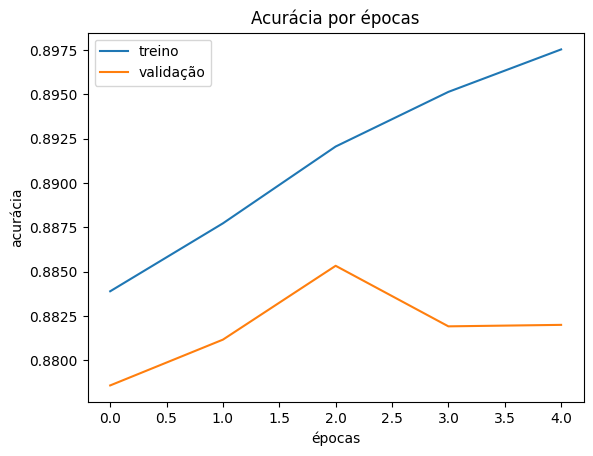

In [40]:
plt.plot(historico.history['accuracy']);
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

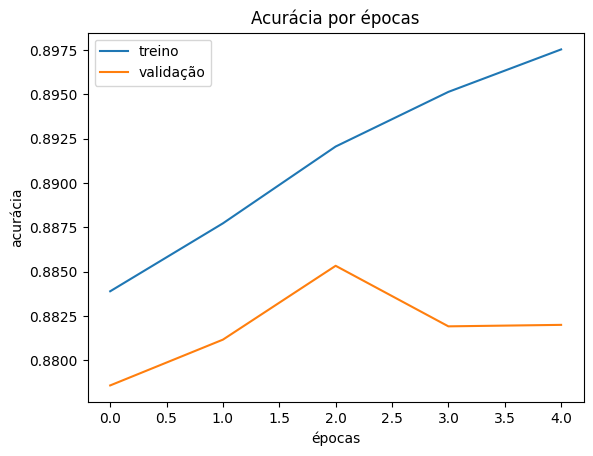

In [41]:
plt.plot(historico.history['accuracy']);
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

In [45]:
modelo.get_config()

{'name': 'sequential_2',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_2_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Flatten',
   'config': {'name': 'flatten_2',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 28, 28)}},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_4',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_na

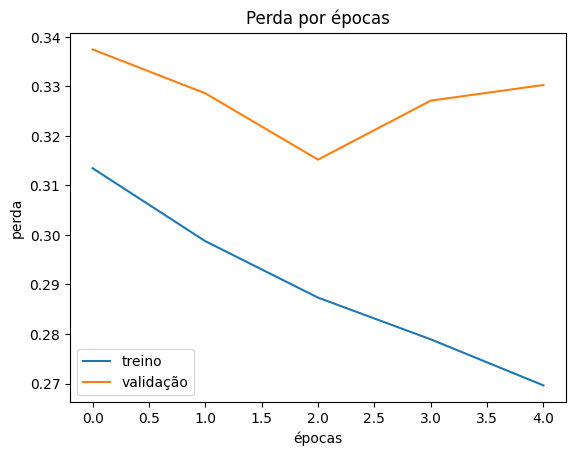

In [42]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [43]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

In [53]:
vieses_camada_dense_zerados = np.zeros((256,))
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense_zerados]
)

In [47]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Visualizando as acurácias de treino e validação por época


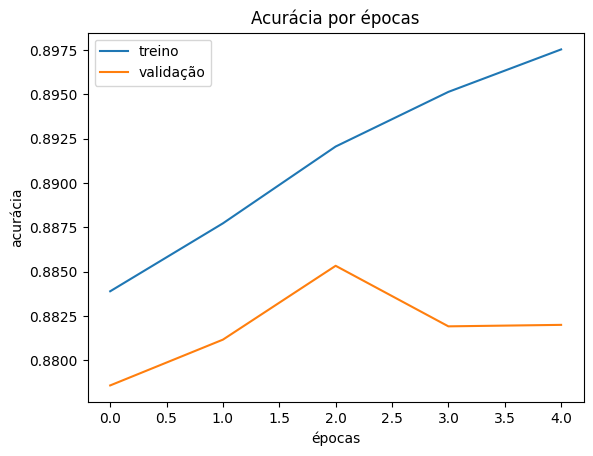

In [48]:
plt.plot(historico.history['accuracy']);
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

Visualizando as perdas de treino e validação por época

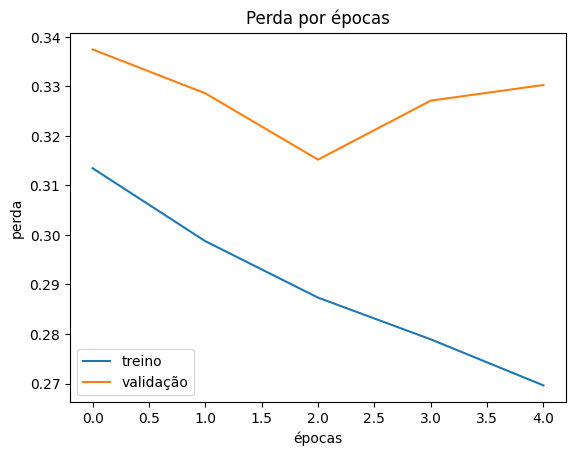

In [49]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Testando o modelo e o modelo salvo

In [50]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

313/313 [==============================] - 1s 2ms/step
resultado teste: 2
número da imagem de teste: 2
313/313 [==============================] - 1s 2ms/step
resultado teste modelo salvo: 2
número da imagem de teste: 2


Avaliando o modelo


In [51]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 72.0822 - accuracy: 0.8482
Perda do teste: 72.08216857910156
Acurácia do teste: 0.8482000231742859
